<a href="https://colab.research.google.com/github/saritmaitra/Mean_Reversion_Trading/blob/main/Mean_reversion_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install quandl
# import quandl

# !pip install yfinance
# import yfinance as yf
import datetime as dt
!pip install quandl
import quandl
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
import matplotlib.gridspec as gridspec
import pandas as pd

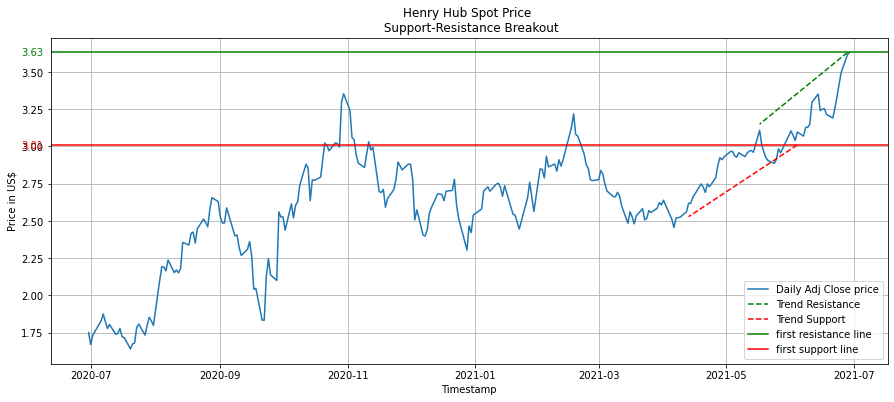

In [2]:
ticker = "CHRIS/CME_NG1"
authtoken="LSQpgUzwJRoF667ZpzyL"
class DataBase():
  def __init__(self, ticker, days):
    self.ticker = ticker
    data =quandl.get(ticker, authtoken=authtoken,
                 start_date='2020-01-01',
                 )
    self.df = pd.DataFrame(data)
    pd.set_option("display.max_columns", None)
    self.df[self.df.index.dayofweek < 5]
    self.df= self.df[-days:]

  def quote(self):
    return self.df

db = DataBase(ticker, 252)
df = db.quote()
df.tail()

pivot_h1 = df['High'][-21:-1].max() # 4 weeks
pivot_h2 = df['High'][-55:-22].max() # 6 weeks post 4 weeks
pivot_l1 = df['Low'][-21:-1].min() # 4 weeks
pivot_l2 = df['Low'][-55:-22].min() # 6 weeks post 4 weeks

a = [df['High'][-21:-1].idxmax(), pivot_h1]
b = [df['High'][-55:-22].idxmax(), pivot_h2]
a1 = [df['Low'][-21:-1].idxmin(), pivot_l1]
b1 = [df['Low'][-55:-22].idxmin(), pivot_l2]

x1_high_values = [a[0], b[0]]
y1_high_values = [a[1], b[1]]
x1_low_values = [a1[0], b1[0]]
y1_low_values = [a1[1], b1[1]]


plt.rcParams.update({'font.size': 10})
# plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.set_ylabel("Price in US$")
ax1.set_xlabel("Timestamp")
ax1.set_title("Henry Hub Spot Price \n Support-Resistance Breakout")

ax1.plot('Settle', data=df, label = 'Daily Adj Close price', 
         ) # if we need thinner line

ax1.plot(x1_high_values, y1_high_values, color='g', linestyle ='--', 
         label = 'Trend Resistance')
ax1.plot(x1_low_values, y1_low_values, color='r', linestyle ='--',
         label = 'Trend Support')

ax1.axhline(y= pivot_h1, color = 'g', label = "first resistance line")
ax1.axhline(y= pivot_l1, color = 'r', label = "first support line")

trans = transform.blended_transform_factory(ax1.get_yticklabels()[0].get_transform(), ax1.transData)

ax1.text(0, pivot_h1, "{:.2f}".format(pivot_h1), color = 'g',
         transform=trans, ha='right', va='center')
ax1.text(0, pivot_l1, "{:.2f}".format(pivot_l1), color = 'r',
         transform=trans, ha='right', va='center')

ax1.legend(); ax1.grid(); plt.show()

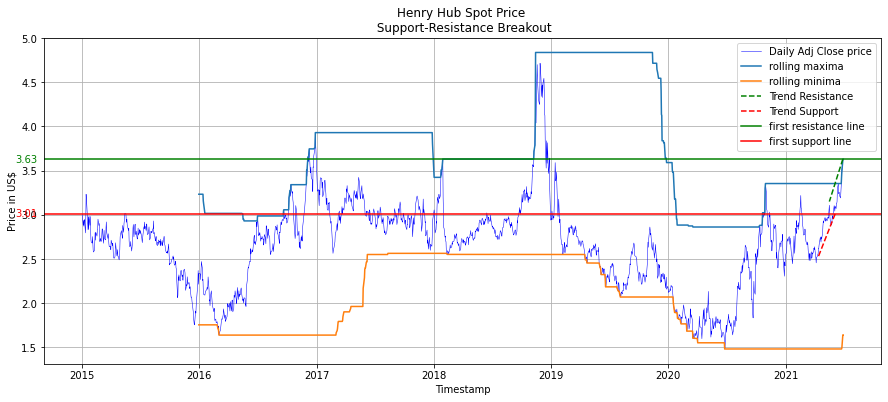

In [13]:
data =quandl.get(ticker, authtoken=authtoken,
                 start_date='2015-01-01',
                 )
data['roll_max'] = data['Settle'].rolling(window=252).max()
data['roll_min'] = data['Settle'].rolling(window=252).min()

pivot_h1 = data['High'][-21:-1].max() # 4 weeks
pivot_h2 = data['High'][-55:-22].max() # 6 weeks post 4 weeks
pivot_l1 = data['Low'][-21:-1].min() # 4 weeks
pivot_l2 = data['Low'][-55:-22].min() # 6 weeks post 4 weeks

a = [data['High'][-21:-1].idxmax(), pivot_h1]
b = [data['High'][-55:-22].idxmax(), pivot_h2]
a1 = [data['Low'][-21:-1].idxmin(), pivot_l1]
b1 = [data['Low'][-55:-22].idxmin(), pivot_l2]

x1_high_values = [a[0], b[0]]
y1_high_values = [a[1], b[1]]
x1_low_values = [a1[0], b1[0]]
y1_low_values = [a1[1], b1[1]]


plt.rcParams.update({'font.size': 10})
# plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.set_ylabel("Price in US$")
ax1.set_xlabel("Timestamp")
ax1.set_title("Henry Hub Spot Price \n Support-Resistance Breakout")

ax1.plot('Settle', data=data, label = 'Daily Adj Close price', 
         color = 'b', LineWidth = 0.5) # if we need thinner line
ax1.plot('roll_max', data=data, label = "rolling maxima"
         ) # if we need thinner line
ax1.plot('roll_min', data=data, label = "rolling minima"
         ) # if we need thinner line
ax1.plot(x1_high_values, y1_high_values, color='g', linestyle ='--', 
         label = 'Trend Resistance')
ax1.plot(x1_low_values, y1_low_values, color='r', linestyle ='--',
         label = 'Trend Support')

ax1.axhline(y= pivot_h1, color = 'g', label = "first resistance line")
ax1.axhline(y= pivot_l1, color = 'r', label = "first support line")

trans = transform.blended_transform_factory(ax1.get_yticklabels()[0].get_transform(), ax1.transData)

ax1.text(0, pivot_h1, "{:.2f}".format(pivot_h1), color = 'g',
         transform=trans, ha='right', va='center')
ax1.text(0, pivot_l1, "{:.2f}".format(pivot_l1), color = 'r',
         transform=trans, ha='right', va='center')

ax1.legend(); ax1.grid(); plt.show()

In [7]:
data['roll_max'] = data['Settle'].rolling(window=252).max().dropna()
data['roll_min'] = data['Settle'].rolling(window=252).min().dropna()
print(data)

             Open   High    Low   Last  Change  Settle    Volume  \
Date                                                               
2015-01-02  2.845  3.096  2.805  3.003   0.114   3.003  116603.0   
2015-01-05  3.076  3.176  2.875  2.882   0.121   2.882  145874.0   
2015-01-06  2.921  2.955  2.811  2.905   0.056   2.938  118120.0   
2015-01-07  2.949  3.012  2.825  2.871   0.067   2.871  140720.0   
2015-01-08  2.877  2.968  2.816  2.927   0.056   2.927  154600.0   
...           ...    ...    ...    ...     ...     ...       ...   
2021-06-23  3.257  3.383  3.250  3.319   0.075   3.333   71748.0   
2021-06-24  3.316  3.442  3.301  3.419   0.085   3.418   48417.0   
2021-06-25  3.425  3.511  3.415  3.510   0.078   3.496   38540.0   
2021-06-28  3.502  3.631  3.485  3.595   0.121   3.617    6622.0   
2021-06-29  3.583  3.811  3.571  3.658   0.037   3.630  201343.0   

            Previous Day Open Interest  roll_max  roll_min  
Date                                                  

In [4]:
data['roll_max'] = data['Settle'].rolling(window=252).max().dropna()
data['roll_min'] = data['Settle'].rolling(window=252).min().dropna()

The example starts with NG data and implements a mean-reversion strategy on the basis of an SMA of 20 days and a threshold value of 0.5 for the absolute deviation of the current price to deviate from the SMA to signal a positioning.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

NG = quandl.get("CHRIS/CME_NG1", authtoken="LSQpgUzwJRoF667ZpzyL",
                 start_date='2015-01-01',
                 ) # natural gas continuous contract 1
NG['returns'] = np.log(NG['Last'] /
                                  NG['Last'].shift(1))
SMA = 20
NG['SMA'] = NG['Last'].rolling(SMA).mean()
threshold = 0.5 
NG['distance'] = NG['Last'] - NG['SMA'] 
NG['distance'].dropna().plot(figsize=(15, 6), legend=True)  
plt.axhline(threshold, color='green')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='k'); 
plt.title("Differences between current price of NG and the SMA \n+ve and -ve threshold value to generate sell and buy signals");  plt.grid(True)


In [ ]:
plt.plot(NG['Adj Close'])

differences between the current price of NG and the SMA, as well as the positive and negative threshold value to generate sell and buy signals, respectively:

In [ ]:
NG['position'] = np.where(NG['distance'] > threshold,
                                      -1, np.nan)  
NG['position'] = np.where(NG['distance'] < -threshold,
                                      1, NG['position'])  

NG['position'] = np.where(NG['distance'] *
                      NG['distance'].shift(1) < 0, 0, NG['position'])  

NG['position'] = NG['position'].ffill().fillna(0)  

NG['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],
                                         figsize=(15, 6));  
plt.grid(True)

- if the distance value is greater than the threshold value, go short (set –1 in the new column position), otherwise set NaN.
- If the distance value is lower than the negative threshold value, go long (set 1), otherwise keep the column position unchanged.
- If there is a change in the sign of the distance value, go market neutral (set 0), otherwise keep the column position unchanged.

In [ ]:
NG['strategy'] = NG['position'].shift(1) * NG['returns']
NG[['returns', 'strategy']].dropna().cumsum(
                  ).apply(np.exp).plot(figsize=(15, 6));
plt.title("Mean-reversion strategy \n(SMA = 20, threshold = 0.5)")
plt.grid(True)

In [ ]:
# class to store tick data
class tickData(object):
  """ Stores a single unit of data """
  def __init__(self,timestamp='',symbol='',open_price=0,close_price=0,total_volume=0):
    self.symbol = symbol
    self.timestamp = timestamp
    self.open_price = open_price
    self.close_price = close_price
    self.total_volume = total_volume

In [ ]:
# class to store price data
class data(object):
  def __init__(self):
    self.recent_ticks = dict() # indexed by symbol

  def add_tick_data(self, tick_data):
    self.recent_ticks[tick_data.symbol] = tick_data

  def get_open_price(self,symbol):
    return self.get_tick_data(symbol).open_price

  def get_close_price(self,symbol):
    return self.get_tick_data(symbol).close_price

  def get_tick_data(self,symbol):
    return self.recent_ticks.get(symbol, tickData())

  def get_timestamp(self,symbol):
    return self.recent_ticks[symbol].timestamp

In [ ]:
# class to generate data sources
class data_source(object):
  def __init__(self, symbol, tick_event_handler = None, start='', end=''):
    self.data = data()
    self.symbol = symbol
    self.tick_event_handler = tick_event_handler
    self.start, self.end = start, end
    self.NG = None
  
  def retrieve_time_series(self): # historical Henry Hub prices
    # df = yf.download(self.symbol, start_date=self.start,end_date=self.end)
    # Update your Quandl API key here...
    QUANDL_API_KEY="LSQpgUzwJRoF667ZpzyL"
    quandl.ApiConfig.api_key=QUANDL_API_KEY
    NG = quandl.get(self.symbol, start_date = self.start, end_date = self.end)
    return NG

  def run(self):
    if self.NG is None:
      self.NG = self.retrieve_time_series()
      
    total_ticks =len(self.NG)
    print('Processing total_ticks:',total_ticks)
    
    for timestamp, row in self.NG.iterrows():
      open_price = row['Open']
      close_price = row['Last']
      volume = row['Volume']
      print(timestamp.date(),'TICK', self.symbol, 'open:', open_price, 'close:', close_price)
      tick_data = tickData(timestamp, self.symbol, open_price, close_price, volume)
      self.data.add_tick_data(tick_data)
      
      if self.tick_event_handler:
        self.tick_event_handler(self.data)

In [ ]:
class Order(object):
  def __init__(self, timestamp, symbol, qty, is_buy, order, price=0):
    self.timestamp = timestamp
    self.symbol = symbol
    self.qty = qty
    self.price = price
    self.is_buy = is_buy
    self.order = order
    self.is_filled = False
    self.filled_price = 0
    self.filled_time = None
    self.filled_qty = 0

In [ ]:
class Position(object):
  def __init__(self,symbol=''):
    self.symbol = symbol
    self.buys = self.sells = self.net=0
    self.retpnl = 0
    self.position_value = 0
  
  def position_event(self, is_buy, qty, price):
    if is_buy:
      self.buys += qty
    else:
      self.sells += qty
      
    self.net = self.buys - self.sells
    changed_value = qty * price * (-1 if is_buy else 1)
    self.position_value += changed_value
    
    if self.net == 0:
      self.retpnl = self.position_value
      self.position_value = 0

  def unrealized_pnl(self, price):
    if self.net == 0:
      return 0
    
    value = self.net*price
    unrpnl = self.position_value + value # unr = unrealized
    return unrpnl

In [ ]:
from abc import abstractmethod

In [ ]:
class Strategy:
  def __init__(self, send_order_event_handler):
    self.send_order_event_handler = send_order_event_handler
    
  @abstractmethod
  def tick_event(self, data):
    raise NotImplementedError('Method is required!')

  @abstractmethod
  def position_event(self, positions):
    raise NotImplementedError('Method is required!')

  def send_order(self, symbol, qty, is_buy, timestamp):
    if self.send_order_event_handler:
      order = Order(timestamp, symbol, qty, is_buy, order = True, price = 0,)
      self.send_order_event_handler(order)

In [ ]:
import pandas as pd
# MRStrat = mean reversion strategy
class MRStrat(Strategy):
  def __init__(self, symbol, trade_qty, send_order_event_handler = None, lookback_intervals = 20, 
               buy_threshold = -0.5, sell_threshold = 0.5):
    super(MRStrat, self).__init__(send_order_event_handler)
    self.symbol = symbol
    self.trade_qty = trade_qty
    self.lookback_intervals = lookback_intervals
    self.buy_threshold = buy_threshold
    self.sell_threshold = sell_threshold
    self.prices = DataFrame()
    self.is_long = self.is_short = False
    
  def position_event(self, positions):
    position = positions.get(self.symbol)
    self.is_long = position and position.net > 0
    self.is_short = position and position.net < 0
    
  def tick_event(self, data):
    self.store_prices(data)
    
    if len(self.prices) < self.lookback_intervals:
      return 
      
    self.generate_signals_and_send_order(data)
      
  def store_prices(self, data):
    timestamp = data.get_timestamp(self.symbol)
    close_price = data.get_close_price(self.symbol)
    self.prices.loc[timestamp,'close'] = close_price

  def generate_signals_and_send_order(self, data):
    signal_value = self.calculate_z_score()
    timestamp = data.get_timestamp(self.symbol)
    
    if self.buy_threshold > signal_value and not self.is_long:
      print(timestamp.date(),'BUY signal')
      self.send_order(self.symbol, self.trade_qty, True, timestamp)
      
    elif self.sell_threshold < signal_value and not self.is_short:
      print(timestamp.date(),'SELL signal')
      self.send_order(self.symbol, self.trade_qty, False, timestamp)
      
  def calculate_z_score(self):
    self.prices = self.prices[-self.lookback_intervals:]
    returns = self.prices['close'].pct_change().dropna()
    z_score = ((returns - returns.mean()) / returns.std())[-1]
    return z_score

In [ ]:
class back_test:
  def __init__(self, symbol, trade_qty, start='', end=''):
    self.symbol = symbol
    self.trade_qty = trade_qty
    self.data_source = data_source(symbol, tick_event_handler = self.tick_event, start = start, end=end)
    self.strategy = None
    self.unfilled_orders = []
    self.positions = dict()
    self.NG_retpnl = None
    
  def start(self, **kwargs):
    print('Backtest started...')
    self.unfilled_orders = []
    self.positions = dict()
    self.NG_retpnl = DataFrame()
    self.strategy = MRStrat(self.symbol, self.trade_qty, 
                            send_order_event_handler = self.order_received, **kwargs)
    self.data_source.run()
    print('---------------Backtest completed-----------------')
    
  def order_received(self, order):
    """ Adds an order to the order book """
    print(order.timestamp.date(),'ORDER', 'BUY' if order.is_buy else 'SELL', order.symbol, order.qty)
    self.unfilled_orders.append(order)
    
  def tick_event(self, data):
    self.match_order_book(data)
    self.strategy.tick_event(data)
    self.print_position_status(data)

  def match_order_book(self, data):
    if len(self.unfilled_orders) > 0:
      self.unfilled_orders = [order for order in self.unfilled_orders if self.match_unfilled_orders(order, data)]

  def match_unfilled_orders(self, order, data):
    symbol = order.symbol
    timestamp = data.get_timestamp(symbol)
    """ Order is matched and filled """
    if order.order and timestamp > order.timestamp:
      open_price = data.get_open_price(symbol)
      order.is_filled = True
      order.filled_timestamp = timestamp
      order.filled_price = open_price
      self.order_filled(symbol, order.qty, order.is_buy, open_price, timestamp)
      return False

    return True
  
  def order_filled(self, symbol, qty, is_buy, filled_price, timestamp):
    position = self.get_position(symbol)
    position.position_event(is_buy, qty, filled_price)
    self.NG_retpnl.loc[timestamp, "ret_pnl"] = position.retpnl
    self.strategy.position_event(self.positions)
    print(timestamp.date(),'FILLED',"BUY" if is_buy else "SELL", qty, symbol, 'at', filled_price)
    
  def get_position(self, symbol):
    if symbol not in self.positions:
      self.positions[symbol] = Position(symbol)
    
    return self.positions[symbol]
      
  def print_position_status(self, data):
    for symbol, position in self.positions.items():
      close_price = data.get_close_price(symbol)
      timestamp = data.get_timestamp(symbol)
      unrpnl = position.unrealized_pnl(close_price)
      print(timestamp.date(),'POSITION','value:%.3f'% position.position_value,'un-realized_pnl:%.3f'%unrpnl,'ret_pnl:%.3f'%position.retpnl)


In [ ]:
strategy = back_test("CHRIS/CME_NG1",1,
                      start='2020-01-01',
                      end='2021-07-09')

strategy.start(lookback_intervals = 20, buy_threshold=-0.5, sell_threshold = 0.5)
%matplotlib inline 
import matplotlib.pyplot as plt
strategy.NG_retpnl.plot(figsize=(15,6));
plt.grid(b=True, color='k', linestyle='-', linewidth=0.2); 
ax.minorticks_on();plt.show()

In [ ]:
THRESHOLDS=[(-0.5,0.5),
            (-1.5,1.5),
            (-2.5,2.0),
            (-1.5,2.5),
            ]

fig, axes = plt.subplots(nrows = len(THRESHOLDS) // 2,
                       ncols = 2, figsize=(15, 6), )
fig.subplots_adjust(hspace = 0.4)
for i, (buy_threshold, sell_threshold) in enumerate(THRESHOLDS):
  strategy.start(lookback_intervals = 15, buy_threshold = buy_threshold, sell_threshold = sell_threshold)
  NG_retpnls=strategy.NG_retpnl
  ax=axes[i // 2, i % 2]
  ax.set_title('Buy-Sell thresholds:(%s,%s)'%(buy_threshold, sell_threshold))
  ax.grid(b=True, which='major', color='b', linestyle='-')
  NG_retpnls.plot(ax=ax)
  plt.tight_layout()